# Keras Cifar 10 (Using CNN)

## <font color='dark'>Import</font>

In [1]:
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D, ZeroPadding2D
from keras.models import load_model 
import pandas as pd
import numpy as np
np.random.seed(10)
%matplotlib inline

Using TensorFlow backend.


## <font color='dark'>Load Data</font>

In [2]:
from keras.datasets import cifar10

(x_img_train, y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
# Shape of data

print('train data : {shape}'.format(shape=x_img_train.shape))
print('test data : {shape}\n'.format(shape=x_img_test.shape))

print('train label : {shape}'.format(shape=y_label_train.shape))
print('test label : {shape}\n'.format(shape=y_label_test.shape))

train data : (50000, 32, 32, 3)
test data : (10000, 32, 32, 3)

train label : (50000, 1)
test label : (10000, 1)



In [4]:
# show image shape and label

print('Shape of img [0] : {shape}\n'.format(shape=x_img_test[0].shape))
print(x_img_test[0])
print('\nLable of img [0] : {shape}'.format(shape=y_label_test[0].shape))
print(y_label_test[0])

Shape of img [0] : (32, 32, 3)

[[[158 112  49]
  [159 111  47]
  [165 116  51]
  ...
  [137  95  36]
  [126  91  36]
  [116  85  33]]

 [[152 112  51]
  [151 110  40]
  [159 114  45]
  ...
  [136  95  31]
  [125  91  32]
  [119  88  34]]

 [[151 110  47]
  [151 109  33]
  [158 111  36]
  ...
  [139  98  34]
  [130  95  34]
  [120  89  33]]

 ...

 [[ 68 124 177]
  [ 42 100 148]
  [ 31  88 137]
  ...
  [ 38  97 146]
  [ 13  64 108]
  [ 40  85 127]]

 [[ 61 116 168]
  [ 49 102 148]
  [ 35  85 132]
  ...
  [ 26  82 130]
  [ 29  82 126]
  [ 20  64 107]]

 [[ 54 107 160]
  [ 56 105 149]
  [ 45  89 132]
  ...
  [ 24  77 124]
  [ 34  84 129]
  [ 21  67 110]]]

Lable of img [0] : (1,)
[3]


In [5]:
# Let the item correspond to the label

load_dict = {0:'airple', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog',
            6:'frog', 7:'horse',8:'ship', 9:'truck'}

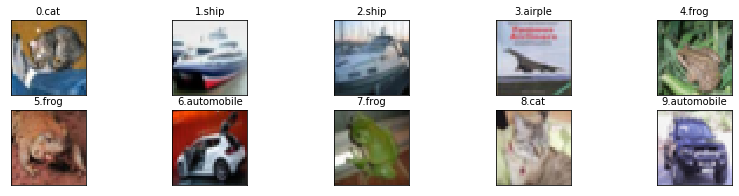

In [6]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(14,8)
    
    # 大於25張只秀出 25 張
    if num>25:
        num =25
    
    for i in range(num):
        ax = plt.subplot(5,5, 1+i)            # 建立 subgraph 子圖形為5行5列
        ax.imshow(images[idx], cmap='binary') # 劃出 subgraph 子圖形
        
        title = str(i)+'.'+load_dict[labels[i][0]]   # 設定 子圖形 title
        if len(prediction)>0:                 # 若有預測值，再加入子圖形 title
            title+=",predict =" + load_dict[prediction[i]]
        
        ax.set_title(title, fontsize=10)      # 把 title 加上去
        ax.set_xticks([]);ax.set_yticks([])   # 設定不顯示刻度
        idx+=1                                # 讀取下一筆
        
    plt.show()
    
plot_images_labels_prediction(x_img_test, y_label_test, [], 0)

## <font color='dark'>Preprocessing Image and Label</font>

In [7]:
# 這是第一個影像的第一個點
print("Original Image : {shape}".format(shape=x_img_train[0][0][0]))

x_img_train_normalize = x_img_train.astype('float32')/255.0
x_img_test_normalize = x_img_test.astype('float32')/255.0

print("After preprocessing : {shape}".format(shape=x_img_train_normalize[0][0][0]))

Original Image : [59 62 63]
After preprocessing : [0.23137255 0.24313726 0.24705882]


In [8]:
print("label original shape :{shape}".format(shape=y_label_train.shape))

# Using One hot encoding
y_label_train_Onehot = np_utils.to_categorical(y_label_train)
y_label_test_Onehot = np_utils.to_categorical(y_label_test)

print("After Onehot encoding shape :{shape}".format(shape=y_label_train.shape))

label original shape :(50000, 1)
After Onehot encoding shape :(50000, 1)


In [9]:
y_label_test_Onehot[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

## <font color='dark'>Build the module</font>

In [10]:
model = Sequential()

In [11]:
# add convolutional layer 1
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),
                 activation='relu',padding='same'))

# add Dropout avoid overfitting
model.add(Dropout(rate=0.25))

# add pooling layer 1
model.add(MaxPool2D(pool_size=(2,2)))

# add convolutional layer 2
model.add(Conv2D(filters=64,kernel_size=(3,3),
                 activation='relu',padding='same'))

# add Dropout avoid overfitting
model.add(Dropout(rate=0.25))

# add pooling layer 2
model.add(MaxPool2D(pool_size=(2,2)))

# Build Neuro Net work - input layer
model.add(Flatten())
model.add(Dropout(rate=0.25))
# Build Neuro Net work - hidden layer
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.25))
# Build Neuro Net work - output layer
model.add(Dense(10,activation='softmax'))

In [12]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

### Define the training way

In [13]:
model.compile(loss = "categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

## <font color='dark'>Train the model</font>

In [14]:
train_history = model.fit(x_img_train_normalize,y_label_train_Onehot,
                         validation_split=0.2,
                         epochs=5,batch_size=128,verbose=2)

# Save the model
model.save('Save_Model/cifar_CNN_model.h5')

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
 - 22s - loss: 1.4860 - acc: 0.4641 - val_loss: 1.2853 - val_acc: 0.5698
Epoch 2/5
 - 19s - loss: 1.1352 - acc: 0.5963 - val_loss: 1.1236 - val_acc: 0.6373
Epoch 3/5
 - 19s - loss: 0.9820 - acc: 0.6535 - val_loss: 1.0117 - val_acc: 0.6668
Epoch 4/5
 - 20s - loss: 0.8756 - acc: 0.6925 - val_loss: 0.9429 - val_acc: 0.6968
Epoch 5/5
 - 20s - loss: 0.7875 - acc: 0.7223 - val_loss: 0.8711 - val_acc: 0.7076


In [15]:
import matplotlib.pyplot as plt 

# train_history 為訓練過程所產生的資料
# train 為 80%訓練用的資料的執行結果， validation 為20%用來驗證的資料的執行結果
def show_train_history(train_history, train, validation):       
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

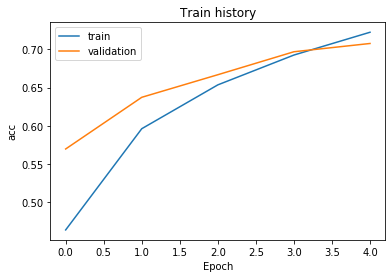

In [16]:
show_train_history(train_history, 'acc', 'val_acc')

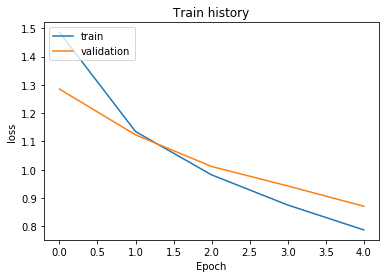

In [17]:
show_train_history(train_history,'loss','val_loss')

In [18]:
scores = model.evaluate(x_img_test_normalize,y_label_test_Onehot)
print("Accuracy : {acc}".format(acc=scores[1]))

10000/10000 [==============================] - 2s 150us/step
Accuracy : 0.7005


In [19]:
# Show the prediction
prediction = model.predict_classes(x_img_test_normalize)

prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 4, 3, 1], dtype=int64)

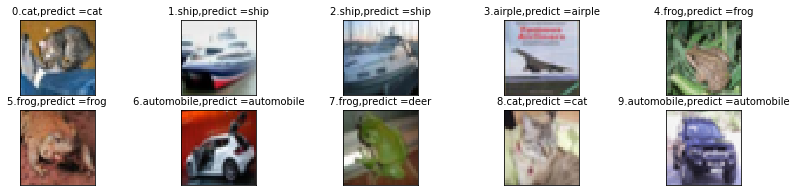

In [20]:
plot_images_labels_prediction(x_img_test,y_label_test,prediction,0,10)

## <font color='dark'>Show the Predict probability</font>

In [21]:
predicted_probability = model.predict(x_img_test_normalize)

predicted_probability[0]

array([0.00513075, 0.00242943, 0.03064182, 0.6092182 , 0.0142509 ,
       0.20549692, 0.05772547, 0.00351263, 0.06982042, 0.00177352],
      dtype=float32)

label :  frog
predict :  frog


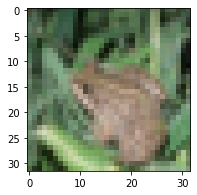

airple--> Predicted Probability : {0.00002}
automobile--> Predicted Probability : {0.00003}
bird--> Predicted Probability : {0.02253}
cat--> Predicted Probability : {0.13255}
deer--> Predicted Probability : {0.27948}
dog--> Predicted Probability : {0.00241}
frog--> Predicted Probability : {0.56243}
horse--> Predicted Probability : {0.00003}
ship--> Predicted Probability : {0.00047}
truck--> Predicted Probability : {0.00005}


In [22]:
def show_predict_probability(y_label_test, prediction, x_img_test, predicted_probability, i):
    print( 'label : ',load_dict[y_label_test[i][0]] )
    print( 'predict : ', load_dict[prediction[i]] )
    
    plt.figure(figsize=(3,3))
    plt.imshow(np.reshape(x_img_test[i],(32,32,3)))
    plt.show()
    
    for j in range(10):
        print(load_dict[j]+"--> Predicted Probability : {%1.5f}"%(predicted_probability[i][j]))
        
show_predict_probability(y_label_test,prediction,x_img_test,predicted_probability,4)

## <font color='dark'>Show the Confusion matrix</font>

In [23]:
print('Shape of prediction : {shape}'.format(shape=prediction.shape))
print('Shape of y_label_matrix : {shape}'.format(shape=y_label_test.shape))

Shape of prediction : (10000,)
Shape of y_label_matrix : (10000, 1)


In [24]:
# reshape the y_label_test

print('Shape of y_label_matrix : {shape}'.format(shape=y_label_test.reshape(-1).shape))

Shape of y_label_matrix : (10000,)


In [25]:
print(load_dict)

pd.crosstab(y_label_test.reshape(-1), prediction,
           rownames=['label'],colnames=['predict'])

{0: 'airple', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,729,12,65,26,11,7,11,5,111,23
1,18,783,15,19,2,6,17,1,59,80
2,62,4,616,49,116,51,58,20,17,7
3,12,8,122,485,99,130,92,28,16,8
4,20,2,92,46,743,14,36,26,20,1
5,6,1,103,170,77,560,33,32,14,4
6,2,4,63,44,62,13,805,1,4,2
7,17,2,49,43,113,54,10,705,4,3
8,41,22,22,13,12,5,11,4,858,12


## <font color="dark">Save Model & Use existed Model</font>

In [26]:
try:
    model_existed=load_model('Save_Model/cifar_CNN_model.h5')
    print("Successfully load the existed model ! ")
except:
    print("Fail to load the model")

Successfully load the existed model ! 


In [27]:
scores = model_existed.evaluate(x_img_test_normalize,y_label_test_Onehot)
print("Accuracy : {acc}".format(acc=scores[1]))

10000/10000 [==============================] - 2s 157us/step
Accuracy : 0.7005
